# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse.linalg import svds

# Import images and convert them into numpy array

In [2]:
images = pd.read_csv('Dataset/data', header=None)

# Remove excessive whitespace from each row and split into array

In [3]:
images_1d=np.apply_along_axis(lambda x: x[0].strip().split(" "), 1, images).flatten().astype(np.float)

# Split matrix into the three images

In [4]:
A,B,G = np.split(images_1d,3)

In [5]:
dim=256
A=A.reshape(dim,dim)
B=B.reshape(dim,dim)
G=G.reshape(dim,dim)

# Get their svd components

In [6]:
Ua, Sa, Va = np.linalg.svd(A)
Ub, Sb, Vb = np.linalg.svd(B)
S = (np.kron(Sb , Sa.T)).reshape(dim,dim)

# Tikhonov regularization

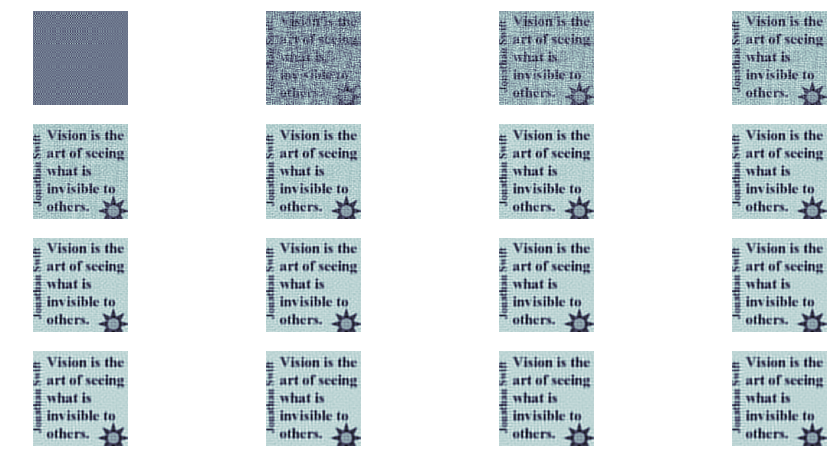

In [73]:
plt.figure(figsize=(16,8))
for a in range(16):
    S_tikh = np.divide(S**2 / (S**2 + (0.0001*a)**2), S)
    F = Vb.T @ np.multiply(Ub.T @ G @ Ua , S_tikh) @ Va
    
    plt.subplot(4,4,a+1)
    plt.imshow(F, cmap='bone')
    plt.axis('off')

# Best alpha seems to be 0.0007

(-0.5, 255.5, 255.5, -0.5)

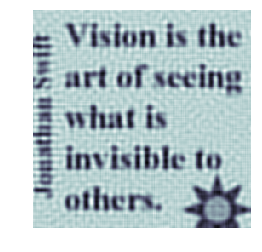

In [80]:
plt.figure(figsize=(4,4))
S_tikh = np.divide(S**2 / (S**2 + (0.0007)**2), S)
F = Vb.T @ np.multiply(Ub.T @ G @ Ua , S_tikh) @ Va
plt.imshow(F, cmap='bone')
plt.axis('off')

# Truncated SVD

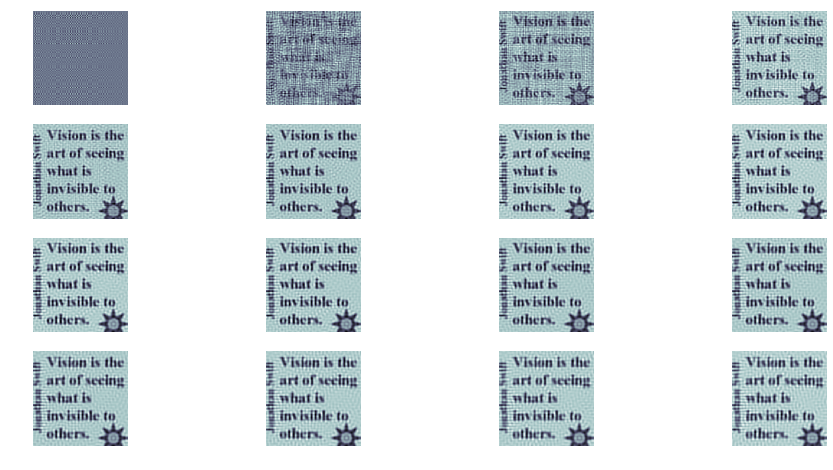

In [65]:
plt.figure(figsize=(16,8))
S_trun=S
for i in range(16):
    p=0.0001*i
    S_trun[S_trun<p]=np.inf
    
    plt.subplot(4,4,i+1)
    F = Vb.T @ np.divide((Ub.T @ G @ Ua) , S_trun) @ Va;
    
    plt.imshow(F, cmap='bone')
    plt.axis('off')

# Best p seems to be 0.0008

(-0.5, 255.5, 255.5, -0.5)

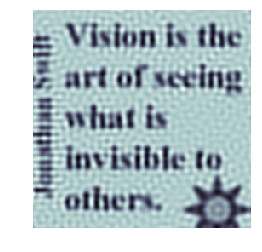

In [82]:
plt.figure(figsize=(4,4))
p=0.0008
S[S<p]=np.inf
F = Vb.T @ np.divide((Ub.T @ G @ Ua) , S) @ Va;
plt.imshow(F, cmap='bone')
plt.axis('off')